In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import re

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data

In [3]:
movie_overview_2021_2017 = pd.read_csv('./movies_2021_2017.csv', index_col='Unnamed: 0')
movie_detail_2021_2017 = pd.read_csv('./movie_details_2021_2017.csv', index_col='Unnamed: 0')
movie_award_2021_2017 = pd.read_csv('./awards_2021_2017.csv', index_col='Unnamed: 0')

movie_overview_2016_2015 = pd.read_csv('./movies_2016_2015.csv', index_col='Unnamed: 0')
movie_detail_2016_2015 = pd.read_csv('./movie_details_2016_2015.csv', index_col='Unnamed: 0')
movie_award_2016_2015 = pd.read_csv('./awards_2016_2015.csv', index_col='Unnamed: 0')


oscars = pd.read_csv('./oscars_1928_2021_major_categories.csv', index_col='Unnamed: 0')
top_1000_movies = pd.read_csv('./imdb_top_1000.csv')


# Concatenate the dataframes

In [4]:
oscars.shape, top_1000_movies.shape

((2374, 4), (1000, 16))

In [5]:
movie_overview_2021_2017.shape, movie_detail_2021_2017.shape , movie_award_2021_2017.shape

((4452, 11), (4452, 17), (4452, 4))

In [6]:
movie_overview_2016_2015.shape, movie_detail_2016_2015.shape , movie_award_2016_2015.shape

((1888, 11), (1888, 17), (1888, 4))

In [7]:
movie_overview = pd.concat([movie_overview_2021_2017,movie_overview_2016_2015],axis = 0)
movie_detail = pd.concat([movie_detail_2021_2017,movie_detail_2016_2015],axis = 0) 
movie_award = pd.concat([movie_award_2021_2017,movie_award_2016_2015],axis = 0) 


movie_overview = movie_overview.reset_index(drop=True)
movie_detail = movie_detail.reset_index(drop=True)
movie_award = movie_award.reset_index(drop=True)


In [8]:
movie_overview.tail(3)


,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year
6337,The Haunting at Woodland Hills,tt1523575,https://www.imdb.com/title/tt1523575/?ref_=adv...,[],84,"Drama, Horror, Thriller",3.4,201,[],Jeremy Casper,2016
6338,Volumes of Blood: Horror Stories,tt6211920,https://www.imdb.com/title/tt6211920/?ref_=adv...,[],118,Horror,3.9,200,[],See full summary,2016
6339,Game of Aces,tt3687118,https://www.imdb.com/title/tt3687118/?ref_=adv...,R,97,"Action, Adventure, War",4.2,200,[],Damien Lay,2016


In [9]:
movie_detail.tail(3)


,title,movie_id,movie_imdb_link,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,release_month,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd
6337,The Haunting at Woodland Hills,tt1523575,https://www.imdb.com/title/tt1523575/?ref_=adv...,Jeremy Casper,Cris Cunningham,Dee Ann Newkirk,T.J. Maxwell,13,"window.addEventListener('load', (event) => {\n...",2016,2016,United States,A Stream In The Desert,35000,1.78 : 1 / (high definition),[],[]
6338,Volumes of Blood: Horror Stories,tt6211920,https://www.imdb.com/title/tt6211920/?ref_=adv...,Sean Blevins,Barbie Clark,Thomas Dunbar,Aric Stanish,3,19,"October 29, 2016",October,United States,[],[],2.39:1,[],[]
6339,Game of Aces,tt3687118,https://www.imdb.com/title/tt3687118/?ref_=adv...,Damien Lay,Chris Klein,Victoria Summer,Werner Daehn,9,3,"September 9, 2016",September,United States,[],500000,2.35 : 1,[],[]


In [10]:
movie_award.tail(3)

,title,movie_id,awards_link,awards_total
6337,The Haunting at Woodland Hills,tt1523575,https://www.imdb.com/title/tt1523575/awards/?r...,Showing all 1 win and 1 nomination
6338,Volumes of Blood: Horror Stories,tt6211920,https://www.imdb.com/title/tt6211920/awards/?r...,Showing all 2 wins and 0 nominations
6339,Game of Aces,tt3687118,https://www.imdb.com/title/tt3687118/awards/?r...,0


In [11]:
movie_detail.drop(['title','movie_id','movie_imdb_link' ], axis=1, inplace=True) # drop duplicate columns

In [12]:
movie_award.drop(['title','movie_id'], axis=1, inplace=True) # drop duplicate columns

In [13]:
movies_df = pd.concat([movie_overview, movie_award, movie_detail ],axis = 1)


In [14]:
movies_df.shape

(6340, 27)

In [15]:
movies_df.tail()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,release_month,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd
6335,A Killer Walks Amongst Us,tt5449390,https://www.imdb.com/title/tt5449390/?ref_=adv...,Not Rated,91,Crime,4.7,201,[],Michael Feifer,2016,https://www.imdb.com/title/tt5449390/awards/?r...,0,Benjamin Shahrabani,Eva LaRue,Ashley Scott,Michael Welch,2,"window.addEventListener('load', (event) => {\n...","August 20, 2019",August,United States,[],[],[],[],Knowing
6336,Blood Sombrero,tt3603104,https://www.imdb.com/title/tt3603104/?ref_=adv...,[],86,"Action, Comedy, Fantasy",3.6,201,[],See full summary,2016,https://www.imdb.com/title/tt3603104/awards/?r...,0,Abel Berry,Billy Blair,Paula Marcenaro Solinger,Nick Gomez,4,"window.addEventListener('load', (event) => {\n...","April 6, 2016",April,United States,[],400000,[],1.78 : 1,[]
6337,The Haunting at Woodland Hills,tt1523575,https://www.imdb.com/title/tt1523575/?ref_=adv...,[],84,"Drama, Horror, Thriller",3.4,201,[],Jeremy Casper,2016,https://www.imdb.com/title/tt1523575/awards/?r...,Showing all 1 win and 1 nomination,Jeremy Casper,Cris Cunningham,Dee Ann Newkirk,T.J. Maxwell,13,"window.addEventListener('load', (event) => {\n...",2016,2016,United States,A Stream In The Desert,35000,1.78 : 1 / (high definition),[],[]
6338,Volumes of Blood: Horror Stories,tt6211920,https://www.imdb.com/title/tt6211920/?ref_=adv...,[],118,Horror,3.9,200,[],See full summary,2016,https://www.imdb.com/title/tt6211920/awards/?r...,Showing all 2 wins and 0 nominations,Sean Blevins,Barbie Clark,Thomas Dunbar,Aric Stanish,3,19,"October 29, 2016",October,United States,[],[],2.39:1,[],[]
6339,Game of Aces,tt3687118,https://www.imdb.com/title/tt3687118/?ref_=adv...,R,97,"Action, Adventure, War",4.2,200,[],Damien Lay,2016,https://www.imdb.com/title/tt3687118/awards/?r...,0,Damien Lay,Chris Klein,Victoria Summer,Werner Daehn,9,3,"September 9, 2016",September,United States,[],500000,2.35 : 1,[],[]


In [16]:
movies_df.columns

Index(['title', 'movie_id', 'movie_imdb_link', 'certificate',
       'runtime_in_mins', 'genre', 'imdb_rating', 'number_of_votes',
       'metascore', 'top_director', 'release_year', 'awards_link',
       'awards_total', 'top_writer', 'top_star_1', 'top_star_2', 'top_star_3',
       'num_user_reviews', 'num_critic_reviews', 'release_date',
       'release_month', 'country_of_origin', 'top_production_company',
       'budget_in_usd', 'opening_weekend_us_can_in_usd', 'gross_us_can_in_usd',
       'gross_worldwide_in_usd'],
      dtype='object')

In [17]:
movies_df.info() # actually there are '[]' and empty strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          6340 non-null   object 
 1   movie_id                       6340 non-null   object 
 2   movie_imdb_link                6340 non-null   object 
 3   certificate                    6340 non-null   object 
 4   runtime_in_mins                6340 non-null   object 
 5   genre                          6340 non-null   object 
 6   imdb_rating                    6340 non-null   float64
 7   number_of_votes                6340 non-null   int64  
 8   metascore                      6340 non-null   object 
 9   top_director                   6340 non-null   object 
 10  release_year                   6340 non-null   int64  
 11  awards_link                    6340 non-null   object 
 12  awards_total                   6340 non-null   o

# awards_total column

In [18]:
#movies_df['awards_total'].value_counts(dropna=False)

In [19]:
movies_df.head(1)

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,release_month,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,PG-13,148,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6.1K,412,"December 17, 2021",December,United States,Columbia Pictures,200000000,260138569,814115070,1916278650


In [20]:
def separete_awards(df):
    df['total_award_nominations'] = '' #creating empty columns
    df['total_award_wins'] = ''

    for i in df.index:
        if df['awards_total'][i] != '0':
            pattern= '\d+'
            numbers = re.findall(pattern,df['awards_total'][i])
            df['total_award_wins'][i] = numbers[0]      
            df['total_award_nominations'][i] = numbers[1]         
      
        else:
            df['total_award_wins'][i] = df['awards_total'][i]
            df['total_award_nominations'][i] = df['awards_total'][i]
    
    return df
    

In [21]:
movies_df_v1 = separete_awards(movies_df)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/3229725514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_award_wins'][i] = numbers[0]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/3229725514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_award_nominations'][i] = numbers[1]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/3229725514.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [22]:
movies_df_v1.head()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,release_month,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,PG-13,148,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6.1K,412,"December 17, 2021",December,United States,Columbia Pictures,200000000,260138569,814115070,1916278650,66,34
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,PG-13,155,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5.6K,509,"October 22, 2021",October,Canada,Warner Bros.,165000000,41011174,108327830,401847900,280,164
2,Don't Look Up,tt11286314,https://www.imdb.com/title/tt11286314/?ref_=ad...,R,138,"Comedy, Drama, Sci-Fi",7.2,529981,49,Adam McKay,2021,https://www.imdb.com/title/tt11286314/awards/?...,Showing all 19 wins and 88 nominations,Adam McKay,Leonardo DiCaprio,Jennifer Lawrence,Meryl Streep,4.6K,309,"December 24, 2021",December,United States,Hyperobject Industries,75000000,[],791863,2.39 : 1,88,19
3,No Time to Die,tt2382320,https://www.imdb.com/title/tt2382320/?ref_=adv...,PG-13,163,"Action, Adventure, Thriller",7.3,393930,68,Cary Joji Fukunaga,2021,https://www.imdb.com/title/tt2382320/awards/?r...,Showing all 35 wins and 69 nominations,Neal Purvis,Daniel Craig,Ana de Armas,Rami Malek,4.1K,449,"October 8, 2021",October,United Kingdom,Metro-Goldwyn-Mayer (MGM),250000000,55225007,160891007,774153007,69,35
4,Zack Snyder's Justice League,tt12361974,https://www.imdb.com/title/tt12361974/?ref_=ad...,R,242,"Action, Adventure, Fantasy",8.0,393504,54,Zack Snyder,2021,https://www.imdb.com/title/tt12361974/awards/?...,Showing all 1 win and 6 nominations,Jerry Siegel,Henry Cavill,Ben Affleck,Gal Gadot,8K,308,"March 18, 2021",March,United States,Atlas Entertainment,300000000,[],[],1.33 : 1,6,1


# genre column

In [23]:
movies_df_v1['genre'].value_counts(dropna=False)

Drama                            525
Horror                           311
Comedy                           282
Comedy, Drama                    261
Horror, Thriller                 244
Thriller                         226
Comedy, Drama, Romance           171
Drama, Romance                   139
Horror, Mystery, Thriller        131
Drama, Thriller                  126
Crime, Drama, Thriller           117
Comedy, Romance                  113
Drama, Horror, Mystery           105
Animation, Adventure, Comedy     102
Action, Crime, Drama              97
Action, Thriller                  90
Action, Adventure, Comedy         87
Comedy, Horror                    85
Drama, Horror, Thriller           76
Crime, Drama, Mystery             63
Action, Adventure, Sci-Fi         62
Biography, Drama, History         60
Action, Crime, Thriller           54
Drama, Mystery, Thriller          51
Biography, Drama                  51
Comedy, Drama, Family             50
Action, Adventure, Drama          49
C

In [24]:
def separete_genre(df):
    df['primary_genre'] = '' #creating empty columns
    df['secondary_genre'] = ''
    
    pattern = "[\w']+"
    
    for i in df.index:
        if df['genre'][i] != '[]':
            g = re.findall(pattern,df['genre'][i])
            
            if len(g)>1:
                df['primary_genre'][i] = g[0]      
                df['secondary_genre'][i] = g[1]
            else:
                df['primary_genre'][i] = df['genre'][i]
                df['secondary_genre'][i] = 'Other'
        else:
            df['primary_genre'][i] = ''
            df['secondary_genre'][i] = ''
    
    return df
    

In [25]:
movies_df_v2 = separete_genre(movies_df_v1)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/4184901931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primary_genre'][i] = g[0]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/4184901931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['secondary_genre'][i] = g[1]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/4184901931.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [26]:
movies_df_v2.tail()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,release_month,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre
6335,A Killer Walks Amongst Us,tt5449390,https://www.imdb.com/title/tt5449390/?ref_=adv...,Not Rated,91,Crime,4.7,201,[],Michael Feifer,2016,https://www.imdb.com/title/tt5449390/awards/?r...,0,Benjamin Shahrabani,Eva LaRue,Ashley Scott,Michael Welch,2,"window.addEventListener('load', (event) => {\n...","August 20, 2019",August,United States,[],[],[],[],Knowing,0,0,Crime,Other
6336,Blood Sombrero,tt3603104,https://www.imdb.com/title/tt3603104/?ref_=adv...,[],86,"Action, Comedy, Fantasy",3.6,201,[],See full summary,2016,https://www.imdb.com/title/tt3603104/awards/?r...,0,Abel Berry,Billy Blair,Paula Marcenaro Solinger,Nick Gomez,4,"window.addEventListener('load', (event) => {\n...","April 6, 2016",April,United States,[],400000,[],1.78 : 1,[],0,0,Action,Comedy
6337,The Haunting at Woodland Hills,tt1523575,https://www.imdb.com/title/tt1523575/?ref_=adv...,[],84,"Drama, Horror, Thriller",3.4,201,[],Jeremy Casper,2016,https://www.imdb.com/title/tt1523575/awards/?r...,Showing all 1 win and 1 nomination,Jeremy Casper,Cris Cunningham,Dee Ann Newkirk,T.J. Maxwell,13,"window.addEventListener('load', (event) => {\n...",2016,2016,United States,A Stream In The Desert,35000,1.78 : 1 / (high definition),[],[],1,1,Drama,Horror
6338,Volumes of Blood: Horror Stories,tt6211920,https://www.imdb.com/title/tt6211920/?ref_=adv...,[],118,Horror,3.9,200,[],See full summary,2016,https://www.imdb.com/title/tt6211920/awards/?r...,Showing all 2 wins and 0 nominations,Sean Blevins,Barbie Clark,Thomas Dunbar,Aric Stanish,3,19,"October 29, 2016",October,United States,[],[],2.39:1,[],[],0,2,Horror,Other
6339,Game of Aces,tt3687118,https://www.imdb.com/title/tt3687118/?ref_=adv...,R,97,"Action, Adventure, War",4.2,200,[],Damien Lay,2016,https://www.imdb.com/title/tt3687118/awards/?r...,0,Damien Lay,Chris Klein,Victoria Summer,Werner Daehn,9,3,"September 9, 2016",September,United States,[],500000,2.35 : 1,[],[],0,0,Action,Adventure


# certificate columns

In [27]:
movies_df_v2['certificate'].value_counts(dropna=False)

[]           1674
R            1487
Not Rated    1052
PG-13         705
TV-MA         452
PG            332
TV-14         283
Unrated       203
TV-PG          77
TV-G           33
G              23
TV-Y7          11
Approved        2
TV-Y7-FV        1
18              1
TV-13           1
M               1
TV-Y            1
T               1
Name: certificate, dtype: int64

In [28]:
movies_df_v2['certificate']= movies_df_v2['certificate'].replace({
    'R':'Adult',
    'PG-13':'+13/14', 
    'TV-13':'+13/14',
    'TV-MA':'Adult',
    'PG': 'Parental Guidance',
    'TV-14': '+13/14',
    'Unrated': 'Not Rated',
    'Approved': 'Not Rated',
    'TV-PG': 'Parental Guidance',
    'TV-G': 'Kids',
    'G': 'Suitable for all',
    'TV-Y7': 'Kids',
    '18': 'Adult',
    'TV-Y': 'Kids',
    'TV-Y7-FV': 'Kids',
    'T':'Adult',
    'M': 'Adult'
})

In [29]:
movies_df_v2['certificate'].value_counts(dropna=False)

Adult                1942
[]                   1674
Not Rated            1257
+13/14                989
Parental Guidance     409
Kids                   46
Suitable for all       23
Name: certificate, dtype: int64

# runtime_in_mins

In [30]:
#movies_df_v2['runtime_in_mins'].value_counts(dropna=False)

# imdb_rating

In [31]:
# movies_df_v2['imdb_rating'].value_counts(dropna=False)

# number of votes

In [32]:
#movies_df_v2['number_of_votes'].value_counts(dropna=False)

# number of user reviews

In [33]:
#movies_df_v2['num_user_reviews'].value_counts(dropna=False)

In [34]:
def drop_k(df):
    
    pattern = "K"
    
    for i in df.index:
        if df['num_user_reviews'][i] != '[]':
            review = re.findall(pattern,df['num_user_reviews'][i]) 
            if len(review)>0:
                a = df['num_user_reviews'][i].replace('K','')    
                df['num_user_reviews'][i] = float(a)*1000
                
            else:
                df['num_user_reviews'][i] = df['num_user_reviews'][i]
        else:
            df['num_user_reviews'][i] = 0
    
    df['num_user_reviews'] =  pd.to_numeric(df['num_user_reviews'], errors='coerce')
    
    return df
    

In [35]:
movies_df_v2 = drop_k(movies_df_v2)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/3710906870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_user_reviews'][i] = float(a)*1000
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/3710906870.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_user_reviews'][i] = df['num_user_reviews'][i]


In [36]:
#movies_df_v2['num_user_reviews'].value_counts(dropna=False)

# number of critic reviews

In [37]:
#movies_df_v2['num_critic_reviews'].value_counts(dropna=False)

In [38]:
movies_df_v2['num_critic_reviews'] =  pd.to_numeric(movies_df_v2['num_critic_reviews'], errors='coerce')

In [39]:
#movies_df_v2['num_critic_reviews'].value_counts(dropna=False)

# release day, month, year, date

## release_month

In [40]:
movies_df_v2['release_month'].value_counts(dropna=False)

October      696
November     559
September    551
August       548
March        530
April        529
June         506
December     482
January      468
May          458
February     448
July         440
2016          33
2017          26
2018          23
2015          12
[]             8
United         8
2020           7
2021           4
2019           4
Name: release_month, dtype: int64

In [41]:
movies_df_v2['release_month']= movies_df_v2['release_month'].replace({
    '2016':'',
    '2017':'',
    '2018':'',
    '2015':'',
    'United': '',
    '2020': '',
    '2021': '',
    '2019': ''
})

In [42]:
movies_df_v2['release_month'].value_counts(dropna=False)

October      696
November     559
September    551
August       548
March        530
April        529
June         506
December     482
January      468
May          458
February     448
July         440
             117
[]             8
Name: release_month, dtype: int64

## release_date

In [43]:
movies_df_v2['release_date'].value_counts(dropna=False)

2016                  33
2017                  26
2018                  23
February 12, 2021     22
December 6, 2019      22
October 12, 2018      21
November 1, 2019      21
September 13, 2019    20
October 6, 2017       19
October 19, 2018      18
October 26, 2018      18
September 14, 2018    18
October 13, 2017      18
October 1, 2021       17
December 9, 2016      17
March 13, 2020        17
June 9, 2017          17
April 1, 2016         17
September 29, 2017    17
December 4, 2020      16
October 21, 2016      16
August 21, 2020       16
February 14, 2020     16
April 21, 2017        16
January 13, 2017      16
August 26, 2016       16
November 2, 2018      16
September 9, 2016     15
October 16, 2015      15
September 16, 2016    15
December 14, 2018     15
March 3, 2017         15
November 15, 2019     15
January 19, 2018      15
September 15, 2017    15
April 13, 2018        15
October 20, 2017      15
August 28, 2020       15
October 25, 2019      14
June 14, 2019         14


In [44]:
movies_df_v2['release_date']= movies_df_v2['release_date'].replace({
    '2016':'',
    '2017':'',
    '2018':''
})

In [45]:
movies_df_v2['release_date']=pd.to_datetime(movies_df_v2['release_date'], errors='coerce')

In [46]:
movies_df_v2['release_date'].value_counts(dropna=False)

NaT           98
2019-11-01    23
2019-12-06    22
2021-02-12    22
2018-10-12    21
2016-04-01    20
2019-09-13    20
2017-10-06    19
2018-09-14    18
2018-10-19    18
2018-10-26    18
2021-10-01    18
2017-10-13    18
2020-03-13    17
2017-09-29    17
2016-12-09    17
2017-06-09    17
2020-08-21    16
2020-12-04    16
2017-01-13    16
2017-04-21    16
2016-08-26    16
2020-02-14    16
2018-11-02    16
2016-10-21    16
2017-03-03    15
2020-08-28    15
2017-09-15    15
2018-04-13    15
2018-01-19    15
2016-09-16    15
2017-10-20    15
2018-12-14    15
2015-10-16    15
2016-09-09    15
2015-01-01    15
2019-11-15    15
2017-12-15    14
2018-09-28    14
2020-03-06    14
2021-06-11    14
2021-08-20    14
2018-04-06    14
2015-08-14    14
2021-09-10    14
2019-09-20    14
2019-01-11    14
2021-09-03    14
2019-06-14    14
2021-11-19    14
2021-08-13    14
2019-10-25    14
2016-06-24    14
2020-12-11    14
2019-02-08    13
2020-10-06    13
2018-09-07    13
2016-04-29    13
2020-10-02    

In [47]:
import datetime as dt

movies_df_v2['release_weekday'] = movies_df_v2['release_date'].dt.isocalendar().day # weekday 5 is a friday


In [48]:
movies_df_v2 = movies_df_v2.drop(['release_month'], axis=1) #dropping the original month column and 
#creating one from datetime. The original release_month column has more nonsensical values


In [49]:
movies_df_v2['release_month'] = pd.DatetimeIndex(movies_df_v2['release_date']).month


In [50]:
movies_df_v2['release_month'].value_counts(dropna=False)

10.0    696
11.0    559
9.0     551
8.0     548
3.0     530
4.0     529
6.0     506
1.0     495
12.0    482
5.0     458
2.0     448
7.0     440
NaN      98
Name: release_month, dtype: int64

In [51]:
movies_df_v2.head()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000,260138569,814115070,1916278650,66,34,Action,Adventure,5,12.0
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000,41011174,108327830,401847900,280,164,Action,Adventure,5,10.0
2,Don't Look Up,tt11286314,https://www.imdb.com/title/tt11286314/?ref_=ad...,Adult,138,"Comedy, Drama, Sci-Fi",7.2,529981,49,Adam McKay,2021,https://www.imdb.com/title/tt11286314/awards/?...,Showing all 19 wins and 88 nominations,Adam McKay,Leonardo DiCaprio,Jennifer Lawrence,Meryl Streep,4600.0,309.0,2021-12-24,United States,Hyperobject Industries,75000000,[],791863,2.39 : 1,88,19,Comedy,Drama,5,12.0
3,No Time to Die,tt2382320,https://www.imdb.com/title/tt2382320/?ref_=adv...,+13/14,163,"Action, Adventure, Thriller",7.3,393930,68,Cary Joji Fukunaga,2021,https://www.imdb.com/title/tt2382320/awards/?r...,Showing all 35 wins and 69 nominations,Neal Purvis,Daniel Craig,Ana de Armas,Rami Malek,4100.0,449.0,2021-10-08,United Kingdom,Metro-Goldwyn-Mayer (MGM),250000000,55225007,160891007,774153007,69,35,Action,Adventure,5,10.0
4,Zack Snyder's Justice League,tt12361974,https://www.imdb.com/title/tt12361974/?ref_=ad...,Adult,242,"Action, Adventure, Fantasy",8.0,393504,54,Zack Snyder,2021,https://www.imdb.com/title/tt12361974/awards/?...,Showing all 1 win and 6 nominations,Jerry Siegel,Henry Cavill,Ben Affleck,Gal Gadot,8000.0,308.0,2021-03-18,United States,Atlas Entertainment,300000000,[],[],1.33 : 1,6,1,Action,Adventure,4,3.0


# release_year

In [52]:
movies_df_v2['release_year'].value_counts(dropna=False)

2018    996
2017    988
2016    988
2019    953
2015    900
2020    760
2021    755
Name: release_year, dtype: int64

# country of origin

In [53]:
movies_df_v2['country_of_origin'].value_counts(dropna=False)

United States                        5542
United Kingdom                        255
Canada                                112
China                                  38
France                                 34
Germany                                30
Spain                                  28
Australia                              28
Mexico                                 22
Ireland                                20
Japan                                  18
Italy                                  15
India                                  13
[]                                      8
Denmark                                 8
Russia                                  8
Hong Kong                               8
Czech Republic                          7
South Africa                            7
Poland                                  7
South Korea                             6
Netherlands                             6
Bulgaria                                5
Hungary                           

In [54]:
movies_df_v2['country_of_origin']= movies_df_v2['country_of_origin'].replace({
    'Official Facebook':'[]',
    'English':'[]',
    'Official DVD and VOD release':'[]',
    'Digit log Studios (United States)':'[]'    
})

In [55]:
movies_df_v2['country_of_origin'].value_counts(dropna=False)

United States             5542
United Kingdom             255
Canada                     112
China                       38
France                      34
Germany                     30
Australia                   28
Spain                       28
Mexico                      22
Ireland                     20
Japan                       18
[]                          16
Italy                       15
India                       13
Hong Kong                    8
Denmark                      8
Russia                       8
Czech Republic               7
South Africa                 7
Poland                       7
South Korea                  6
Netherlands                  6
Belgium                      5
Bulgaria                     5
Israel                       5
Hungary                      5
Sweden                       5
Thailand                     5
Colombia                     4
Puerto Rico                  4
Finland                      4
Serbia                       4
Brazil  

# metascore

In [56]:
#movies_df_v2['metascore'].value_counts(dropna=False) # turns out that most values are empty. replace [] wih 'Not scored'



In [57]:
movies_df_v2['metascore']= movies_df_v2['metascore'].replace({
    '[]':'Not scored'    
})


In [58]:
#movies_df_v2['metascore'].value_counts(dropna=False)

# top_production_company

In [59]:
#movies_df_v2['top_production_company'].value_counts(dropna=False)

# budget_in_usd

In [60]:
#movies_df_v2['budget_in_usd'].value_counts(dropna=False)

In [61]:
def remove_currency(row): 
    if type(row) != float:
        row = row.replace('$', '')
        if '€' in row:
            row = row.replace('€', '').strip() # no cunversion needed as of date
        if 'CA' in row:
            row = row.replace('CA', '').strip()
            row = str(int(row)*0.73) 
        if '₹' in row:
            row = row.replace('₹', '').strip()
            row = str(int(row)*0.012) 
        if '£' in row:
            row = row.replace('£', '').strip()
            row = str(int(row)*1.14)
        if 'CN¥' in row:
            row = row.replace('CN¥', '').strip()
            row = str(int(row)*0.0067)
        if 'RUR' in row:
            row = row.replace('RUR', '').strip()
            row = str(int(row)*0.016)
             
    return row

movies_df_v2['budget_in_usd'] = movies_df_v2['budget_in_usd'].apply(remove_currency)

In [62]:
#movies_df_v2['budget_in_usd'].value_counts(dropna=False)

# opening_weekend_us_can_in_usd

In [63]:
#movies_df_v2['opening_weekend_us_can_in_usd'].value_counts(dropna=False)

In [64]:
def remove_nonsensical(row): 
    if type(row) != float:
        if ':' in row:
            row = np.nan
            
    return row

In [65]:
movies_df_v2['opening_weekend_us_can_in_usd'] = movies_df_v2['opening_weekend_us_can_in_usd'].apply(remove_nonsensical)

In [66]:
#movies_df_v2['opening_weekend_us_can_in_usd'].value_counts(dropna=False)

# gross_us_can_in_usd

In [67]:
#movies_df_v2['gross_us_can_in_usd'].value_counts(dropna=False)

In [68]:
movies_df_v2['gross_us_can_in_usd'] = movies_df_v2['gross_us_can_in_usd'].apply(remove_nonsensical)


In [69]:
#movies_df_v2['gross_us_can_in_usd'].value_counts(dropna=False)

# gross_worldwide_in_usd

In [70]:
#movies_df_v2['gross_worldwide_in_usd'].value_counts(dropna=False)

In [71]:
movies_df_v2['gross_worldwide_in_usd'] = movies_df_v2['gross_worldwide_in_usd'].apply(remove_nonsensical)


In [72]:
#movies_df_v2['gross_worldwide_in_usd'].value_counts(dropna=False)

# top_director

In [73]:
# movies_df_v2['top_director'].value_counts(dropna=False) # everything looks ok

# top_writer

In [74]:
# movies_df_v2['top_writer'].value_counts(dropna=False) # everything looks ok, there are a few []

# top_star_1

In [75]:
#movies_df_v2['top_star_1'].value_counts(dropna=False) # everything looks ok, there are a few []

# top_star_2

In [76]:
#movies_df_v2['top_star_2'].value_counts(dropna=False) # everything looks ok, there are a few []

# top_star_3

In [77]:
#movies_df_v2['top_star_3'].value_counts(dropna=False) # everything looks ok, there are a few []

# Resurface nans

In [78]:
#movies_df_v2.isna().sum() # previous method

In [79]:
movies_df_v2.isna().sum()

title                               0
movie_id                            0
movie_imdb_link                     0
certificate                         0
runtime_in_mins                     0
genre                               0
imdb_rating                         0
number_of_votes                     0
metascore                           0
top_director                        0
release_year                        0
awards_link                         0
awards_total                        0
top_writer                          0
top_star_1                          0
top_star_2                          0
top_star_3                          0
num_user_reviews                    0
num_critic_reviews                717
release_date                       98
country_of_origin                   0
top_production_company              0
budget_in_usd                       0
opening_weekend_us_can_in_usd    2080
gross_us_can_in_usd                90
gross_worldwide_in_usd            741
total_award_

In [80]:
movies_df_v2.replace('',np.nan, inplace=True)
movies_df_v2.replace('[]',np.nan, inplace=True)

In [81]:
movies_df_v2.isna().sum()

title                               0
movie_id                            0
movie_imdb_link                     0
certificate                      1674
runtime_in_mins                    17
genre                               2
imdb_rating                         0
number_of_votes                     0
metascore                           0
top_director                        1
release_year                        0
awards_link                         0
awards_total                        0
top_writer                         16
top_star_1                         69
top_star_2                         76
top_star_3                         89
num_user_reviews                    0
num_critic_reviews                717
release_date                       98
country_of_origin                  16
top_production_company           3538
budget_in_usd                    2978
opening_weekend_us_can_in_usd    4647
gross_us_can_in_usd              4361
gross_worldwide_in_usd           3789
total_award_

# dtype conversions

In [82]:
movies_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   title                          6340 non-null   object        
 1   movie_id                       6340 non-null   object        
 2   movie_imdb_link                6340 non-null   object        
 3   certificate                    4666 non-null   object        
 4   runtime_in_mins                6323 non-null   object        
 5   genre                          6338 non-null   object        
 6   imdb_rating                    6340 non-null   float64       
 7   number_of_votes                6340 non-null   int64         
 8   metascore                      6340 non-null   object        
 9   top_director                   6339 non-null   object        
 10  release_year                   6340 non-null   int64         
 11  awards_link      

In [83]:
# turn some columns into numeric

In [84]:
cols_numeric = ['runtime_in_mins','num_user_reviews', 'metascore','budget_in_usd', 'opening_weekend_us_can_in_usd',
            'gross_us_can_in_usd', 'gross_worldwide_in_usd','total_award_nominations',
            'total_award_wins']

movies_df_v2[cols_numeric] = movies_df_v2[cols_numeric].apply(pd.to_numeric, errors='coerce', axis=1)


In [85]:
cols_object = ['release_year','release_month', 'release_weekday']

movies_df_v2[cols_object] = movies_df_v2[cols_object].astype(object)

In [86]:
movies_df_v2.isna().sum()

title                               0
movie_id                            0
movie_imdb_link                     0
certificate                      1674
runtime_in_mins                    17
genre                               2
imdb_rating                         0
number_of_votes                     0
metascore                        3648
top_director                        1
release_year                        0
awards_link                         0
awards_total                        0
top_writer                         16
top_star_1                         69
top_star_2                         76
top_star_3                         89
num_user_reviews                    0
num_critic_reviews                717
release_date                       98
country_of_origin                  16
top_production_company           3538
budget_in_usd                    2981
opening_weekend_us_can_in_usd    4647
gross_us_can_in_usd              4361
gross_worldwide_in_usd           5447
total_award_

In [87]:
movies_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   title                          6340 non-null   object        
 1   movie_id                       6340 non-null   object        
 2   movie_imdb_link                6340 non-null   object        
 3   certificate                    4666 non-null   object        
 4   runtime_in_mins                6323 non-null   float64       
 5   genre                          6338 non-null   object        
 6   imdb_rating                    6340 non-null   float64       
 7   number_of_votes                6340 non-null   int64         
 8   metascore                      2692 non-null   float64       
 9   top_director                   6339 non-null   object        
 10  release_year                   6340 non-null   object        
 11  awards_link      

# Feature engineering

Before I impute nans, I would like to add columns based on the existing columns.

In [88]:
#new columns:

# whether the movie won/nominated for oscar in picture category (the best/supporting actress/actor category
    #is handled in the next ways below)

# total number of oscar nominations by the top 3 stars in their lifetime (in best/supporting actor/actress)

# total number of oscar wins by the top 3 stars in their lifetime (in best/supporting actor/actress)

# also individual win/nomination columns for each of the three leading stars in each movie

# whether the top_director has ever directed a top_1000 movie (Y/N)


## Oscars

In [89]:
oscars.head()

,Title,Winner,Award,Year
0,Belfast,N,Picture,2021
1,CODA,Y,Picture,2021
2,Don't Look Up,N,Picture,2021
3,Drive My Car,N,Picture,2021
4,Dune,N,Picture,2021


In [90]:
oscars_copy_movie = oscars.copy()
oscars_copy_movie['oscar_nomination'] = oscars_copy_movie.loc[:, 'Winner']
oscars_copy_movie = oscars_copy_movie.drop(['Year', 'Award'], axis=1) 

oscars_copy_movie = oscars_copy_movie.rename(columns={'Title':'title', 'Winner':'oscar_win',
                                          'oscar_nomination':'oscar_nomination'})

oscars_copy_movie['oscar_nomination']= oscars_copy_movie['oscar_nomination'].replace({'N':'Y'})
oscars_copy_movie.head()

,title,oscar_win,oscar_nomination
0,Belfast,N,Y
1,CODA,Y,Y
2,Don't Look Up,N,Y
3,Drive My Car,N,Y
4,Dune,N,Y


In [91]:
movies_df_v3 = pd.merge(movies_df_v2, oscars_copy_movie, how='left', on='title')

movies_df_v3['oscar_win']=movies_df_v3['oscar_win'].fillna('N')
movies_df_v3['oscar_nomination']=movies_df_v3['oscar_nomination'].fillna('N')
movies_df_v3.head()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71.0,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74.0,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y
2,Don't Look Up,tt11286314,https://www.imdb.com/title/tt11286314/?ref_=ad...,Adult,138.0,"Comedy, Drama, Sci-Fi",7.2,529981,49.0,Adam McKay,2021,https://www.imdb.com/title/tt11286314/awards/?...,Showing all 19 wins and 88 nominations,Adam McKay,Leonardo DiCaprio,Jennifer Lawrence,Meryl Streep,4600.0,309.0,2021-12-24,United States,Hyperobject Industries,75000000.0,NaN,791863.0,NaN,88.0,19.0,Comedy,Drama,5,12.0,N,Y
3,No Time to Die,tt2382320,https://www.imdb.com/title/tt2382320/?ref_=adv...,+13/14,163.0,"Action, Adventure, Thriller",7.3,393930,68.0,Cary Joji Fukunaga,2021,https://www.imdb.com/title/tt2382320/awards/?r...,Showing all 35 wins and 69 nominations,Neal Purvis,Daniel Craig,Ana de Armas,Rami Malek,4100.0,449.0,2021-10-08,United Kingdom,Metro-Goldwyn-Mayer (MGM),250000000.0,55225007.0,160891007.0,7.741530e+08,69.0,35.0,Action,Adventure,5,10.0,N,N
4,Zack Snyder's Justice League,tt12361974,https://www.imdb.com/title/tt12361974/?ref_=ad...,Adult,242.0,"Action, Adventure, Fantasy",8.0,393504,54.0,Zack Snyder,2021,https://www.imdb.com/title/tt12361974/awards/?...,Showing all 1 win and 6 nominations,Jerry Siegel,Henry Cavill,Ben Affleck,Gal Gadot,8000.0,308.0,2021-03-18,United States,Atlas Entertainment,300000000.0,NaN,NaN,NaN,6.0,1.0,Action,Adventure,4,3.0,N,N


In [92]:
oscars['Award'].value_counts(dropna=False)

Picture               581
Actress               469
Actor                 464
Supporting Actor      430
Supporting Actress    430
Name: Award, dtype: int64

In [93]:
oscars.shape

(2374, 4)

In [94]:
oscars_copy_star = oscars[oscars['Award']!='Picture']
oscars_copy_star['oscar_nomination'] = oscars_copy_star.loc[:, 'Winner']
oscars_copy_star = oscars_copy_star.drop(['Year', 'Award'], axis=1) 

oscars_copy_star = oscars_copy_star.rename(columns={'Title':'top_star', 'Winner':'oscar_win_top_star',
                                          'oscar_nomination':'oscar_nomination_top_star'})

oscars_copy_star['oscar_nomination_top_star']= oscars_copy_star['oscar_nomination_top_star'].replace({'N':'Y'})

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/4046713429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars_copy_star['oscar_nomination'] = oscars_copy_star.loc[:, 'Winner']


In [95]:
oscars_copy_star.head()

,top_star,oscar_win_top_star,oscar_nomination_top_star
10,Jessica Chastain,Y,Y
11,Olivia Colman,N,Y
12,Penélope Cruz,N,Y
13,Nicole Kidman,N,Y
14,Kristen Stewart,N,Y


In [96]:
oscars_copy_star.shape

(1793, 3)

In [97]:
# wins
oscars_copy_star_w = oscars_copy_star.drop(['oscar_nomination_top_star'], axis=1)

oscars_copy_star_wins = oscars_copy_star_w[oscars_copy_star_w['oscar_win_top_star']=='Y']

#nominations
oscars_copy_star_nominations = oscars_copy_star.drop(['oscar_win_top_star'], axis=1)


In [98]:
number_of_oscar_wins_per_star=oscars_copy_star_wins.pivot_table(index= ['top_star'],  aggfunc = ['count'])

number_of_oscar_nominations_per_star=oscars_copy_star_nominations.pivot_table(index= ['top_star'],  aggfunc = ['count'])



In [99]:
number_of_oscar_wins_per_star.columns = number_of_oscar_wins_per_star.columns.droplevel(0)
number_of_oscar_wins_per_star = number_of_oscar_wins_per_star.reset_index().rename_axis(None, axis=1)


In [100]:
number_of_oscar_wins_per_star.head()

,top_star,oscar_win_top_star
0,Adrien Brody,1
1,Al Pacino,1
2,Alan Arkin,1
3,Alec Guinness,1
4,Alice Brady,1


In [101]:
number_of_oscar_nominations_per_star.columns = number_of_oscar_nominations_per_star.columns.droplevel(0)
number_of_oscar_nominations_per_star = number_of_oscar_nominations_per_star.reset_index().rename_axis(None, axis=1)
number_of_oscar_nominations_per_star.head()

,top_star,oscar_nomination_top_star
0,Abigail Breslin,1
1,Adam Driver,2
2,Adolph Caesar,1
3,Adolphe Menjou,1
4,Adriana Barraza,1


In [102]:
number_of_oscar_wins_per_star = number_of_oscar_wins_per_star.rename(columns={'top_star':'top_star',
                                        'oscar_win_top_star':'total_oscar_wins_top_star'})

number_of_oscar_nominations_per_star = number_of_oscar_nominations_per_star.rename(columns={'top_star':'top_star',
                                        'oscar_nomination_top_star':'total_oscar_nominations_top_star'})

In [103]:
number_of_oscar_wins_per_star.shape, number_of_oscar_nominations_per_star.shape

((311, 2), (955, 2))

In [104]:
# top_star_1

In [105]:
number_of_oscar_wins_per_star_1 = number_of_oscar_wins_per_star.copy()

number_of_oscar_wins_per_star_1 = number_of_oscar_wins_per_star_1.rename(columns={'top_star':'top_star_1',
                                    'total_oscar_wins_top_star':'total_oscar_wins_top_star_1'})

number_of_oscar_nominations_per_star_1 = number_of_oscar_nominations_per_star.copy()

number_of_oscar_nominations_per_star_1 = number_of_oscar_nominations_per_star_1.rename(columns={'top_star':'top_star_1',
                    'total_oscar_nominations_top_star':'total_oscar_nominations_top_star_1'})



In [106]:
movies_df_v4 = pd.merge(movies_df_v3, number_of_oscar_wins_per_star_1, how='left', on='top_star_1')


In [107]:
movies_df_v5 = pd.merge(movies_df_v4, number_of_oscar_nominations_per_star_1, how='left', on='top_star_1')

In [108]:
# top_star_2

In [109]:
number_of_oscar_wins_per_star_2 = number_of_oscar_wins_per_star.copy()

number_of_oscar_wins_per_star_2 = number_of_oscar_wins_per_star_2.rename(columns={'top_star':'top_star_2',
                                    'total_oscar_wins_top_star':'total_oscar_wins_top_star_2'})

number_of_oscar_nominations_per_star_2 = number_of_oscar_nominations_per_star.copy()

number_of_oscar_nominations_per_star_2 = number_of_oscar_nominations_per_star_2.rename(columns={'top_star':'top_star_2',
                        'total_oscar_nominations_top_star':'total_oscar_nominations_top_star_2'})



In [110]:
movies_df_v6 = pd.merge(movies_df_v5, number_of_oscar_wins_per_star_2, how='left', on='top_star_2')

In [111]:
movies_df_v7 = pd.merge(movies_df_v6, number_of_oscar_nominations_per_star_2, how='left', on='top_star_2')

In [112]:
# top_star_3

In [113]:
number_of_oscar_wins_per_star_3 = number_of_oscar_wins_per_star.copy()

number_of_oscar_wins_per_star_3 = number_of_oscar_wins_per_star_3.rename(columns={'top_star':'top_star_3',
                                    'total_oscar_wins_top_star':'total_oscar_wins_top_star_3'})

number_of_oscar_nominations_per_star_3 = number_of_oscar_nominations_per_star.copy()

number_of_oscar_nominations_per_star_3 = number_of_oscar_nominations_per_star_3.rename(columns={'top_star':'top_star_3',
                        'total_oscar_nominations_top_star':'total_oscar_nominations_top_star_3'})



In [114]:
movies_df_v8 = pd.merge(movies_df_v7, number_of_oscar_wins_per_star_3, how='left', on='top_star_3')

In [115]:
movies_df_v9 = pd.merge(movies_df_v8, number_of_oscar_nominations_per_star_3, how='left', on='top_star_3')

In [116]:
movies_df_v9.head()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71.0,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,NaN,NaN,NaN,NaN,NaN,2.0
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74.0,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,NaN,NaN,NaN,NaN,NaN,NaN
2,Don't Look Up,tt11286314,https://www.imdb.com/title/tt11286314/?ref_=ad...,Adult,138.0,"Comedy, Drama, Sci-Fi",7.2,529981,49.0,Adam McKay,2021,https://www.imdb.com/title/tt11286314/awards/?...,Showing all 19 wins and 88 nominations,Adam McKay,Leonardo DiCaprio,Jennifer Lawrence,Meryl Streep,4600.0,309.0,2021-12-24,United States,Hyperobject Industries,75000000.0,NaN,791863.0,NaN,88.0,19.0,Comedy,Drama,5,12.0,N,Y,1.0,6.0,1.0,4.0,3.0,21.0
3,No Time to Die,tt2382320,https://www.imdb.com/title/tt2382320/?ref_=adv...,+13/14,163.0,"Action, Adventure, Thriller",7.3,393930,68.0,Cary Joji Fukunaga,2021,https://www.imdb.com/title/tt2382320/awards/?r...,Showing all 35 wins and 69 nominations,Neal Purvis,Daniel Craig,Ana de Armas,Rami Malek,4100.0,449.0,2021-10-08,United Kingdom,Metro-Goldwyn-Mayer (MGM),250000000.0,55225007.0,160891007.0,7.741530e+08,69.0,35.0,Action,Adventure,5,10.0,N,N,NaN,NaN,NaN,NaN,1.0,1.0
4,Zack Snyder's Justice League,tt12361974,https://www.imdb.com/title/tt12361974/?ref_=ad...,Adult,242.0,"Action, Adventure, Fantasy",8.0,393504,54.0,Zack Snyder,2021,https://www.imdb.com/title/tt12361974/awards/?...,Showing all 1 win and 6 nominations,Jerry Siegel,Henry Cavill,Ben Affleck,Gal Gadot,8000.0,308.0,2021-03-18,United States,Atlas Entertainment,300000000.0,NaN,NaN,NaN,6.0,1.0,Action,Adventure,4,3.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#movies_df_v9.isna().sum()

In [118]:
columns_v9 = ['total_oscar_wins_top_star_1', 'total_oscar_nominations_top_star_1', 'total_oscar_wins_top_star_2', 
        'total_oscar_nominations_top_star_2', 'total_oscar_wins_top_star_3', 'total_oscar_nominations_top_star_3']

movies_df_v9[columns_v9] = movies_df_v9[columns_v9].fillna(value=0)



In [119]:
#movies_df_v9.isna().sum()

In [120]:
columns_for_win_sum = ['total_oscar_wins_top_star_1', 'total_oscar_wins_top_star_2','total_oscar_wins_top_star_3']

columns_for_nomi_sum = ['total_oscar_nominations_top_star_1', 'total_oscar_nominations_top_star_2',
                        'total_oscar_nominations_top_star_3']


movies_df_v9['summed_oscar_wins_stars']= movies_df_v9[columns_for_win_sum].sum(axis=1)
movies_df_v9['summed_oscar_nominations_stars']= movies_df_v9[columns_for_nomi_sum].sum(axis=1)

In [121]:
movies_df_v9.head(3)

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71.0,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74.0,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Don't Look Up,tt11286314,https://www.imdb.com/title/tt11286314/?ref_=ad...,Adult,138.0,"Comedy, Drama, Sci-Fi",7.2,529981,49.0,Adam McKay,2021,https://www.imdb.com/title/tt11286314/awards/?...,Showing all 19 wins and 88 nominations,Adam McKay,Leonardo DiCaprio,Jennifer Lawrence,Meryl Streep,4600.0,309.0,2021-12-24,United States,Hyperobject Industries,75000000.0,NaN,791863.0,NaN,88.0,19.0,Comedy,Drama,5,12.0,N,Y,1.0,6.0,1.0,4.0,3.0,21.0,5.0,31.0


In [122]:
movies_df_v9_copy =movies_df_v9.copy()

In [123]:
movies_df_v9_copy.shape

(6344, 42)

In [124]:
def owns_any_oscars(df):

    df['stars_own_or_won_an_oscar_before_or_after'] = '' #creating an empty column
    
    for i in df.index:
        if df['summed_oscar_wins_stars'][i] == 0:
            df['stars_own_or_won_an_oscar_before_or_after'][i] = 'N'      
         
        else:
            df['stars_own_or_won_an_oscar_before_or_after'][i] = 'Y'
  
    return df

movies_df_v9_added = owns_any_oscars(movies_df_v9_copy)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2789494782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stars_own_or_won_an_oscar_before_or_after'][i] = 'N'
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2789494782.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stars_own_or_won_an_oscar_before_or_after'][i] = 'Y'


In [125]:
movies_df_v9_added['stars_own_or_won_an_oscar_before_or_after'].value_counts(dropna=False)

N    5812
Y     532
Name: stars_own_or_won_an_oscar_before_or_after, dtype: int64

In [126]:
movies_df_v9_added.shape

(6344, 43)

## Top director

In [127]:
top_1000_movies.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


In [128]:
top_1000_movies_copy = top_1000_movies.copy()
best_directors =top_1000_movies_copy.pivot_table(index= ['Director'],  aggfunc = ['count'])
best_directors.head()

count                                     \
                    Certificate Genre Gross IMDB_Rating Meta_score   
Director                                                             
Aamir Khan                    1     1     1           1          0   
Aaron Sorkin                  1     1     1           1          1   
Abdellatif Kechiche           1     1     1           1          1   
Abhishek Chaubey              1     1     1           1          0   
Abhishek Kapoor               1     1     1           1          1   

                                                                            \
                    No_of_Votes Overview Poster_Link Released_Year Runtime   
Director                                                                     
Aamir Khan                    1        1           1             1       1   
Aaron Sorkin                  1        1           1             1       1   
Abdellatif Kechiche           1        1           1             1       1   
Abhishek Chaubey              1        1           1             1       1   
Abhishek Kapoor               1        1           1             1       1   

                                                          
                    Series_Title Star1 Star2 Star3 Star4  
Director                                                  
Aamir Khan                     1     1     1     1     1  
Aaron Sorkin                   1     1     1     1     1  
Abdellatif Kechiche            1     1     1     1     1  
Abhishek Chaubey               1     1     1     1     1  
Abhishek Kapoor                1     1     1     1     1

In [129]:
best_directors.columns = best_directors.columns.droplevel(0)
best_directors = best_directors.reset_index().rename_axis(None, axis=1)
best_directors.head()

,Director,Certificate,Genre,Gross,IMDB_Rating,Meta_score,No_of_Votes,Overview,Poster_Link,Released_Year,Runtime,Series_Title,Star1,Star2,Star3,Star4
0,Aamir Khan,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
1,Aaron Sorkin,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Abdellatif Kechiche,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Abhishek Chaubey,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
4,Abhishek Kapoor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [130]:
best_directors = best_directors.drop(['Genre', 'Gross', 'IMDB_Rating',
       'Meta_score', 'No_of_Votes', 'Overview', 'Poster_Link', 'Released_Year',
       'Runtime', 'Series_Title', 'Star1', 'Star2', 'Star3', 'Star4'], axis=1)

best_directors = best_directors.rename(columns={'Director':'top_director',
                                    'Certificate':'is_among_best_director'})

best_directors['is_among_best_director'] = 'Y'

In [131]:
best_directors.shape


(548, 2)

In [132]:
movies_df_v9_added.shape

(6344, 43)

In [133]:
movies_df_v10 = pd.merge(movies_df_v9_added, best_directors, how='left', on='top_director')

In [134]:
movies_df_v10.head(2)

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71.0,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,NaN
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74.0,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y


In [135]:
movies_df_v10['is_among_best_director']=movies_df_v10['is_among_best_director'].fillna('N')

In [136]:
movies_df_v10.head(2)

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71.0,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,N
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74.0,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y


In [137]:
movies_df_v10.dtypes

title                                                object
movie_id                                             object
movie_imdb_link                                      object
certificate                                          object
runtime_in_mins                                     float64
genre                                                object
imdb_rating                                         float64
number_of_votes                                       int64
metascore                                           float64
top_director                                         object
release_year                                         object
awards_link                                          object
awards_total                                         object
top_writer                                           object
top_star_1                                           object
top_star_2                                           object
top_star_3                              

In [138]:
movies_df_v10.to_csv('movies_untreated_for_NaNs.csv')


# Outlier detection & removal

In [139]:
def plot_boxplot(df): 
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show()
    return None


In [140]:
box_df=movies_df_v10[['runtime_in_mins', 'imdb_rating', 'number_of_votes', 'metascore',
       'num_user_reviews', 'num_critic_reviews', 'budget_in_usd',
       'opening_weekend_us_can_in_usd', 'gross_us_can_in_usd',
       'gross_worldwide_in_usd']]

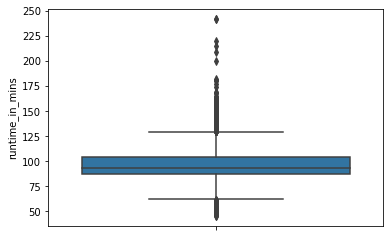

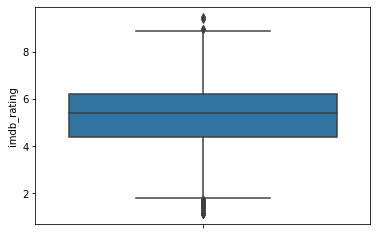

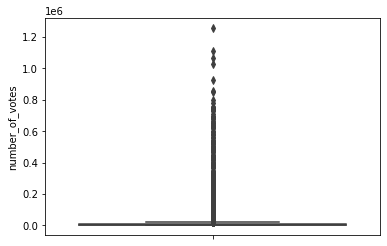

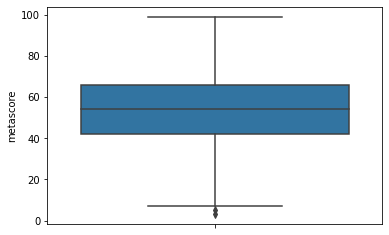

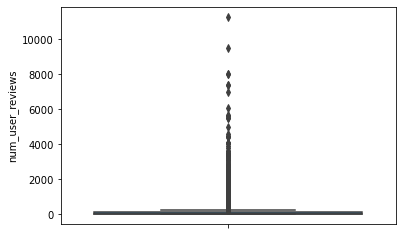

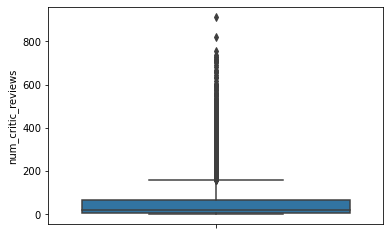

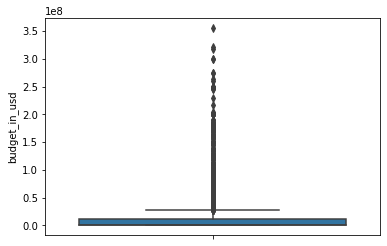

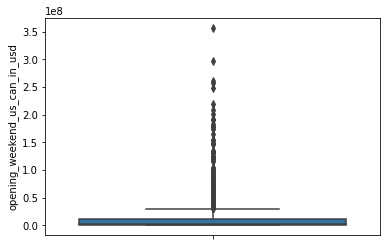

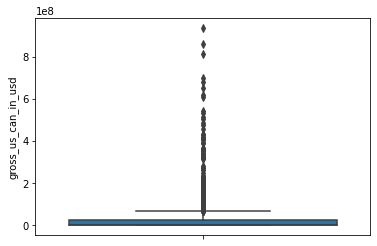

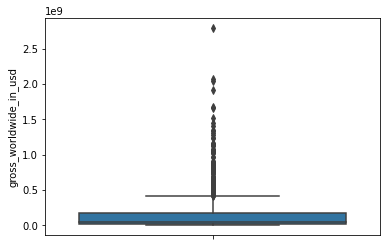

In [141]:
plot_boxplot(box_df)

In [142]:
# 'budget_in_usd',
    
extraordinary_points_budget = movies_df_v10[(movies_df_v10['budget_in_usd'] <10000)]
print(len(extraordinary_points_budget)) 

# tentatively calling all movies with budget lower than 10 000 usd an outlier

289


In [143]:
movies_df_v10.shape

(6344, 44)

In [144]:
movies_df_v10_bud = movies_df_v10[~(
    movies_df_v10['budget_in_usd'] < 10000)]

In [145]:
movies_df_v10_bud.shape

(6055, 44)

In [146]:
# 'opening_weekend_us_can_in_usd'
extraordinary_points_openweek = movies_df_v10_bud[(movies_df_v10_bud['opening_weekend_us_can_in_usd'] <100)]
print(len(extraordinary_points_openweek)) 

# not removing anything based on this because this column can actually be quite low


1


In [147]:
# 'gross_us_can_in_usd',

extraordinary_points_gross_uscan = movies_df_v10_bud[(movies_df_v10_bud['gross_us_can_in_usd'] <2000)]
print(len(extraordinary_points_gross_uscan)) 

# I saw one movie that actually has 2000 something USD as gross worldwide. Therefore, I am keeping the outlier
# treshold in this columns quite low.

14


In [148]:
extraordinary_points_gross_uscan

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director
989,Money Plane,tt7286966,https://www.imdb.com/title/tt7286966/?ref_=adv...,Not Rated,82.0,"Comedy, Crime, Thriller",3.2,5371,NaN,Andrew Lawrence,2020,https://www.imdb.com/title/tt7286966/awards/?r...,0,Tyler W. Konney,Adam Copeland,Kelsey Grammer,Thomas Jane,90.0,24.0,2020-07-10,United States,NaN,5000000.0,NaN,618.0,NaN,0.0,0.0,Comedy,Crime,5,7.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
1019,Tar,tt4351684,https://www.imdb.com/title/tt4351684/?ref_=adv...,Not Rated,96.0,"Adventure, Horror, Thriller",4.7,4148,NaN,Aaron Wolf,2020,https://www.imdb.com/title/tt4351684/awards/?r...,0,Timothy Nuttall,Timothy Bottoms,Graham Greene,Aaron Wolf,42.0,7.0,2020-10-02,United States,NaN,22307.0,22307.0,1469.0,NaN,0.0,0.0,Adventure,Horror,5,10.0,N,N,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,N,N
1053,The Serpent,tt6984230,https://www.imdb.com/title/tt6984230/?ref_=adv...,NaN,89.0,"Action, Thriller",4.0,3213,NaN,Gia Skova,2020,https://www.imdb.com/title/tt6984230/awards/?r...,0,Gia Skova,Gia Skova,Travis Aaron Wade,Nigel Vonas,73.0,7.0,2021-06-18,United States,Serpent Production,1200000.0,NaN,1200.0,NaN,0.0,0.0,Action,Thriller,5,6.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
1955,Max Winslow and the House of Secrets,tt8896632,https://www.imdb.com/title/tt8896632/?ref_=adv...,Parental Guidance,98.0,"Family, Sci-Fi, Thriller",5.1,2207,NaN,Sean Olson,2019,https://www.imdb.com/title/tt8896632/awards/?r...,Showing all 13 wins and 6 nominations,Jeff Wild,Chad Michael Murray,Marina Sirtis,Sydne Mikelle,35.0,25.0,2020-10-23,United States,Skipstone Pictures,31250.0,89532.0,425.0,NaN,6.0,13.0,Family,Sci,5,10.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
2311,Guest Artist,tt8650976,https://www.imdb.com/title/tt8650976/?ref_=adv...,Not Rated,74.0,Drama,5.3,335,NaN,Timothy Busfield,2019,https://www.imdb.com/title/tt8650976/awards/?r...,Showing all 13 wins and 15 nominations,Jeff Daniels,Jeff Daniels,Thomas Macias,Richard McWilliams,15.0,7.0,2020-07-10,United States,NaN,10017.0,10017.0,944.0,NaN,15.0,13.0,Drama,Other,5,7.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
3603,Marrowbone,tt5886440,https://www.imdb.com/title/tt5886440/?ref_=adv...,Adult,110.0,"Adventure, Drama, Horror",6.6,32259,63.0,Sergio G. Sánchez,2017,https://www.imdb.com/title/tt5886440/awards/?r...,Showing all 2 wins and 2 nominations,Sergio G. Sánchez,George MacKay,Anya Taylor-Joy,Charlie Heaton,186.0,130.0,2018-04-13,Spain,Lionsgate,8000000.0,624.0,1377.0,12294931.0,2.0,2.0,Adventure,Drama,5,4.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
3761,68 Kill,tt5189894,https://www.imdb.com/title/tt5189894/?ref_=adv...,Adult,93.0,"Comedy, Crime, Thriller",6.0,6028,56.0,Trent Haaga,2017,https://www.imdb.com/title/tt5189894/awards/?r...,Showing all 3 wins and 1 nomination,Trent Haaga,Matthew Gray Gubler,AnnaLynne McCord,Alisha Boe,51.0,65.0,2017-08-04,United States,NaN,520000.0,NaN,522.0,NaN,1.0,3.0,Comedy,Crime,5,8.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N
3812,Division 19,tt2492344,https://www.imdb.com/title/tt2492344/?ref_=adv...,NaN,93.0,"Action, Sci-Fi, Thriller",4.4,4053,NaN,S.A. Halewood,2017,https://www.imdb.com/title/tt2492344/awards/?r...,Showing all 2 wins and 0 nominations,S.A. Halewood,Alison Doody,Linus Roache,Lott

In [149]:
movies_df_v10_gross_uscan = movies_df_v10_bud[~(
    movies_df_v10['gross_us_can_in_usd'] < 2000)]

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2653494470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_df_v10_gross_uscan = movies_df_v10_bud[~(


In [150]:
movies_df_v10_gross_uscan.shape

(6041, 44)

In [151]:
# 'gross_worldwide_in_usd'

extraordinary_points_gross_world = movies_df_v10_gross_uscan[(movies_df_v10_gross_uscan['gross_worldwide_in_usd'] <2000)]
print(len(extraordinary_points_gross_world))

# this column seems to have no outliers


0


In [152]:
movies_df_v10_gross_uscan.shape

(6041, 44)

In [153]:
900/6041

0.14898195662969707

In [154]:
movies_df_v10_gross_uscan.to_csv('movies_untreated_for_NaNs__treated_for_outliers.csv')


# EDA and preprocessing data for modelling

There are many NaNs in the data, especially in the target column and in several of the important features.

## Imputing NaNs

In [155]:
movies_df_v10_gross_uscan.isna().sum()

title                                           0
movie_id                                        0
movie_imdb_link                                 0
certificate                                  1570
runtime_in_mins                                16
genre                                           2
imdb_rating                                     0
number_of_votes                                 0
metascore                                    3477
top_director                                    1
release_year                                    0
awards_link                                     0
awards_total                                    0
top_writer                                     16
top_star_1                                     66
top_star_2                                     72
top_star_3                                     84
num_user_reviews                                0
num_critic_reviews                            686
release_date                                   95


In [156]:
#movies_df_v10.isna().sum()

In [157]:
# I will continue with a filtered data where the financial columns are not null.

mask1 = movies_df_v10_gross_uscan['gross_worldwide_in_usd'].notnull()
mask2 = movies_df_v10_gross_uscan['opening_weekend_us_can_in_usd'].notnull()
mask3 = movies_df_v10_gross_uscan['budget_in_usd'].notnull()

movies_filtered = movies_df_v10_gross_uscan[mask1 & mask2 & mask3].copy()

In [158]:
movies_filtered.shape

(893, 44)

In [159]:
movies_filtered.isna().sum()

title                                         0
movie_id                                      0
movie_imdb_link                               0
certificate                                   8
runtime_in_mins                               0
genre                                         0
imdb_rating                                   0
number_of_votes                               0
metascore                                    39
top_director                                  0
release_year                                  0
awards_link                                   0
awards_total                                  0
top_writer                                    0
top_star_1                                    0
top_star_2                                    0
top_star_3                                    0
num_user_reviews                              0
num_critic_reviews                            6
release_date                                  0
country_of_origin                       

In [160]:
#movies_filtered['metascore'].value_counts(dropna=False)

In [161]:
movies_filtered['metascore'] = movies_filtered['metascore'].fillna(round(np.mean(movies_filtered['metascore']),0)).astype(int)


In [162]:
movies_filtered['top_production_company'].value_counts(dropna=False)


NaN                                   52
Universal Pictures                    42
Columbia Pictures                     38
Warner Bros.                          35
Paramount Pictures                    32
Twentieth Century Fox                 23
Summit Entertainment                  22
Walt Disney Pictures                  21
New Line Cinema                       19
Metro-Goldwyn-Mayer (MGM)             15
Lionsgate                             14
BRON Studios                          12
CBS Films                             11
Fox 2000 Pictures                     11
Annapurna Pictures                    10
Marvel Studios                        10
Blumhouse Productions                  9
Focus Features                         9
A24                                    8
Searchlight Pictures                   8
20th Century Studios                   7
Screen Gems                            7
New Regency Productions                7
Dreamworks Pictures                    7
STX Entertainmen

In [163]:
movies_filtered.shape

(893, 44)

In [164]:
def group_prod_company(df):

    major_prod_company = ['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures']
    df['top_production_company_grouped'] = '' #creating an empty column
    
    for i in df.index:
        if df['top_production_company'][i] not in major_prod_company:
            df['top_production_company_grouped'][i] = 'Other'      
         
        else:
            df['top_production_company_grouped'][i] = df['top_production_company'][i]
  
    return df



In [165]:
movies_filtered_v1 = group_prod_company(movies_filtered)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2722901165.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_production_company_grouped'][i] = df['top_production_company'][i]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2722901165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_production_company_grouped'][i] = 'Other'


In [166]:
movies_filtered['top_production_company'].value_counts(dropna=False)

NaN                                   52
Universal Pictures                    42
Columbia Pictures                     38
Warner Bros.                          35
Paramount Pictures                    32
Twentieth Century Fox                 23
Summit Entertainment                  22
Walt Disney Pictures                  21
New Line Cinema                       19
Metro-Goldwyn-Mayer (MGM)             15
Lionsgate                             14
BRON Studios                          12
CBS Films                             11
Fox 2000 Pictures                     11
Annapurna Pictures                    10
Marvel Studios                        10
Blumhouse Productions                  9
Focus Features                         9
A24                                    8
Searchlight Pictures                   8
20th Century Studios                   7
Screen Gems                            7
New Regency Productions                7
Dreamworks Pictures                    7
STX Entertainmen

In [167]:
movies_filtered_v1['top_production_company_grouped'].value_counts(dropna=False)

Other                 746
Universal Pictures     42
Columbia Pictures      38
Warner Bros.           35
Paramount Pictures     32
Name: top_production_company_grouped, dtype: int64

In [168]:
movies_filtered_v1.head()

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director,top_production_company_grouped
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,N,Columbia Pictures
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,Warner Bros.
3,No Time to Die,tt2382320,https://www.imdb.com/title/tt2382320/?ref_=adv...,+13/14,163.0,"Action, Adventure, Thriller",7.3,393930,68,Cary Joji Fukunaga,2021,https://www.imdb.com/title/tt2382320/awards/?r...,Showing all 35 wins and 69 nominations,Neal Purvis,Daniel Craig,Ana de Armas,Rami Malek,4100.0,449.0,2021-10-08,United Kingdom,Metro-Goldwyn-Mayer (MGM),250000000.0,55225007.0,160891007.0,7.741530e+08,69.0,35.0,Action,Adventure,5,10.0,N,N,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Y,Y,Other
5,Shang-Chi and the Legend of the Ten Rings,tt9376612,https://www.imdb.com/title/tt9376612/?ref_=adv...,+13/14,132.0,"Action, Adventure, Fantasy",7.4,375735,71,Destin Daniel Cretton,2021,https://www.imdb.com/title/tt9376612/awards/?r...,Showing all 19 wins and 66 nominations,Dave Callaham,Simu Liu,Awkwafina,Tony Chiu-Wai Leung,2400.0,338.0,2021-09-03,United States,Walt Disney Pictures,200000000.0,75388688.0,224543292.0,4.322433e+08,66.0,19.0,Action,Adventure,5,9.0,N,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,Other
6,Black Widow,tt3480822,https://www.imdb.com/title/tt3480822/?ref_=adv...,+13/14,134.0,"Action, Adventure, Sci-Fi",6.7,373180,67,Cate Shortland,2021,https://www.imdb.com/title/tt3480822/awards/?r...,Showing all 10 wins and 30 nominations,Eric Pearson,Scarlett Johansson,Florence Pugh,David Harbour,3100.0,390.0,2021-07-09,United States,Marvel Studios,200000000.0,80366312.0,183651655.0,3.797517e+08,30.0,10.0,Action,Adventure,5,7.0,N,N,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,N,N,Other


In [169]:
movies_filtered_v1['top_production_company'].value_counts(dropna=False)

NaN                                   52
Universal Pictures                    42
Columbia Pictures                     38
Warner Bros.                          35
Paramount Pictures                    32
Twentieth Century Fox                 23
Summit Entertainment                  22
Walt Disney Pictures                  21
New Line Cinema                       19
Metro-Goldwyn-Mayer (MGM)             15
Lionsgate                             14
BRON Studios                          12
CBS Films                             11
Fox 2000 Pictures                     11
Annapurna Pictures                    10
Marvel Studios                        10
Blumhouse Productions                  9
Focus Features                         9
A24                                    8
Searchlight Pictures                   8
20th Century Studios                   7
Screen Gems                            7
New Regency Productions                7
Dreamworks Pictures                    7
STX Entertainmen

In [170]:
movies_filtered_v1['top_production_company']= movies_filtered_v1['top_production_company'].fillna('Other')

In [171]:
movies_filtered_v1['top_production_company'].isna().sum()

0

In [172]:
movies_filtered_v1['country_of_origin'].value_counts()

United States           692
United Kingdom          101
Canada                   16
China                    16
France                    9
Germany                   6
Australia                 6
Hong Kong                 5
Ireland                   5
Japan                     4
Finland                   3
Spain                     3
Italy                     3
India                     3
Czech Republic            3
Mexico                    2
Chile                     2
Israel                    1
Russia                    1
Norway                    1
South Korea               1
Panama                    1
Iceland                   1
Thailand                  1
Poland                    1
United Arab Emirates      1
Switzerland               1
Denmark                   1
New Zealand               1
Georgia                   1
Belgium                   1
Name: country_of_origin, dtype: int64

In [173]:
def group_country(df):

    df['country_of_origin_grouped'] = '' #creating an empty column
    
    for i in df.index:
        if df['country_of_origin'][i] != 'United States':
            df['country_of_origin_grouped'][i] = 'Other'      
         
        else:
            df['country_of_origin_grouped'][i] = df['country_of_origin'][i]
  
    return df


In [174]:
movies_filtered_v2 = group_country(movies_filtered_v1)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2431420963.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_of_origin_grouped'][i] = df['country_of_origin'][i]
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_62134/2431420963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_of_origin_grouped'][i] = 'Other'


In [175]:
movies_filtered_v2['country_of_origin_grouped'].value_counts()

United States    692
Other            201
Name: country_of_origin_grouped, dtype: int64

In [176]:
movies_filtered_v2.head(2)

,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director,top_production_company_grouped,country_of_origin_grouped
0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,N,Columbia Pictures,United States
1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,Warner Bros.,Other


In [177]:
movies_filtered_v2['primary_genre'].value_counts(dropna=False)

Action       281
Comedy       149
Drama        142
Biography    101
Animation     73
Adventure     52
Horror        45
Crime         38
Fantasy        4
Thriller       4
Romance        1
Music          1
Mystery        1
Musical        1
Name: primary_genre, dtype: int64

In [178]:
movies_filtered_v2['secondary_genre'].value_counts(dropna=False)

Drama        223
Adventure    197
Comedy        73
Crime         66
Other         56
Horror        47
Thriller      45
Romance       41
Mystery       36
Fantasy       25
Family        17
Biography     13
Action        13
Sci           12
History        7
Music          7
Sport          5
War            4
Musical        3
Western        3
Name: secondary_genre, dtype: int64

In [179]:
movies_filtered_v2['primary_genre']= movies_filtered_v2['primary_genre'].replace({'Fantasy': 'Other',
        'Thriller': 'Other','Romance': 'Other', 'Music': 'Other', 'Mystery': 'Other', 'Musical': 'Other' })

movies_filtered_v2['primary_genre'].value_counts(dropna=False)


Action       281
Comedy       149
Drama        142
Biography    101
Animation     73
Adventure     52
Horror        45
Crime         38
Other         12
Name: primary_genre, dtype: int64

In [180]:
movies_filtered_v2['secondary_genre']= movies_filtered_v2['secondary_genre'].replace({'Mystery': 'Other',
        'Fantasy': 'Other','Family': 'Other', 'Biography': 'Other', 'Action': 'Other', 'Sci': 'Other',
        'History': 'Other','Music': 'Other', 'Sport': 'Other', 'War': 'Other', 'Musical': 'Other', 
        'Western': 'Other'})

movies_filtered_v2['secondary_genre'].value_counts(dropna=False)


Drama        223
Other        201
Adventure    197
Comedy        73
Crime         66
Horror        47
Thriller      45
Romance       41
Name: secondary_genre, dtype: int64

## Plots

In [181]:
def plot_countplot(df): # suitable for categorical and discrete-numerical columns
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None

def plot_displot(df): #suitable for continuous numerical columns
    for column in df.columns:
        sns.displot(df[column], kde=True)
        plt.show()
    return None


In [182]:
def cat_to_plot(df):
        
    plot_lst = []
    not_plot_lst = []
    
    for column in df.columns:               
        if len(df[column].unique()) < 15: 
            plot_lst.append(column)
        else:
            not_plot_lst.append(column)
                    
    plot_df= df[plot_lst]
    
    return plot_df

In [183]:
numericals_df=movies_filtered_v2.select_dtypes(np.number)
categoricals_df=movies_filtered_v2.select_dtypes(object)

In [184]:
#numericals_df.columns
numericals_df= numericals_df.drop(['total_oscar_wins_top_star_1', 'total_oscar_nominations_top_star_1',
       'total_oscar_wins_top_star_2', 'total_oscar_nominations_top_star_2',
       'total_oscar_wins_top_star_3', 'total_oscar_nominations_top_star_3',], axis=1)

In [185]:
numericals_df.columns

Index(['runtime_in_mins', 'imdb_rating', 'number_of_votes', 'metascore',
       'num_user_reviews', 'num_critic_reviews', 'budget_in_usd',
       'opening_weekend_us_can_in_usd', 'gross_us_can_in_usd',
       'gross_worldwide_in_usd', 'total_award_nominations', 'total_award_wins',
       'summed_oscar_wins_stars', 'summed_oscar_nominations_stars'],
      dtype='object')

In [186]:
# categoricals_df.columns
categoricals_df = categoricals_df.drop(['title', 'movie_id', 'movie_imdb_link', 'genre',
       'top_director', 'awards_link', 'awards_total',
       'top_writer', 'top_star_1', 'top_star_2', 'top_star_3',
       'country_of_origin', 'top_production_company'], axis=1)

In [187]:
categoricals_df.columns


Index(['certificate', 'release_year', 'primary_genre', 'secondary_genre',
       'release_weekday', 'release_month', 'oscar_win', 'oscar_nomination',
       'stars_own_or_won_an_oscar_before_or_after', 'is_among_best_director',
       'top_production_company_grouped', 'country_of_origin_grouped'],
      dtype='object')

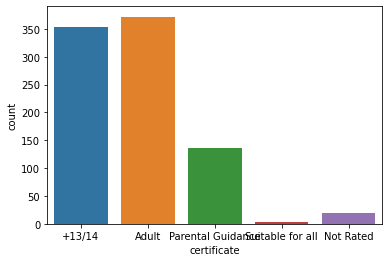

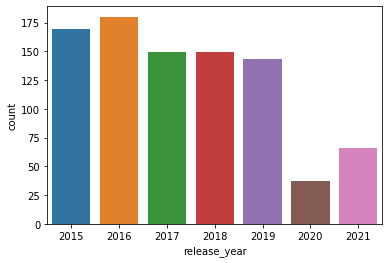

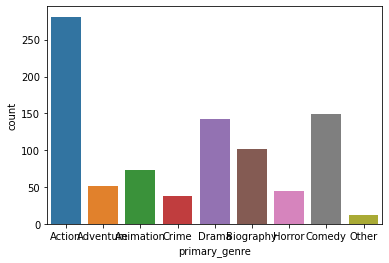

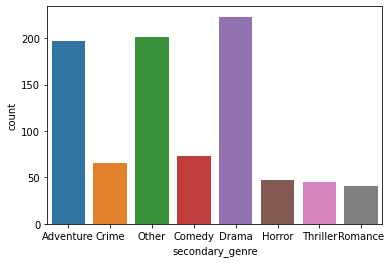

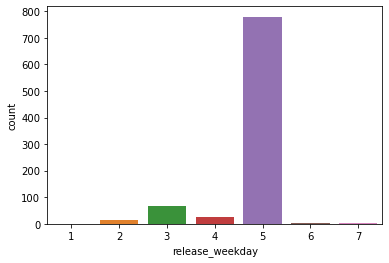

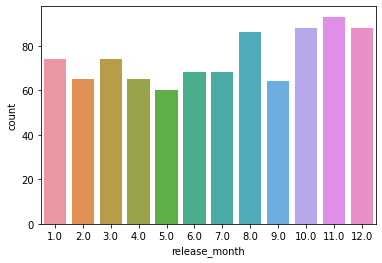

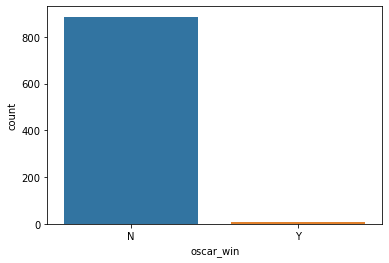

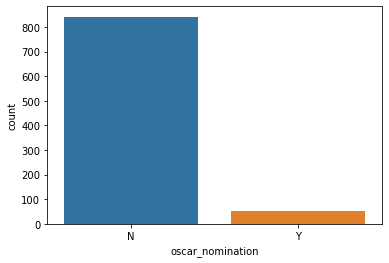

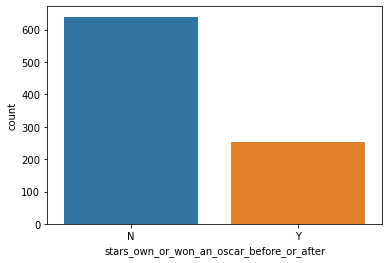

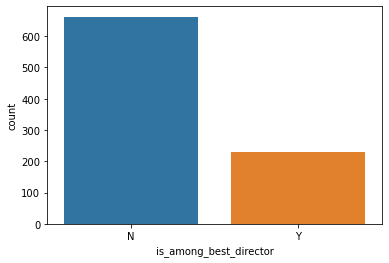

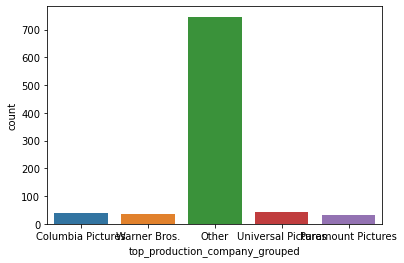

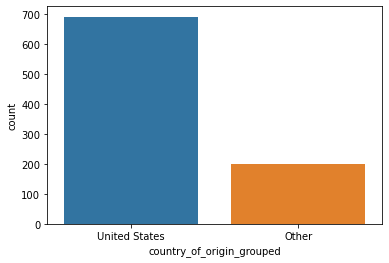

In [188]:
plot_countplot(categoricals_df)

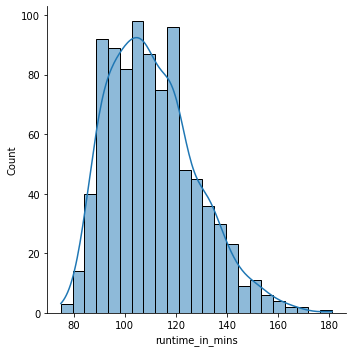

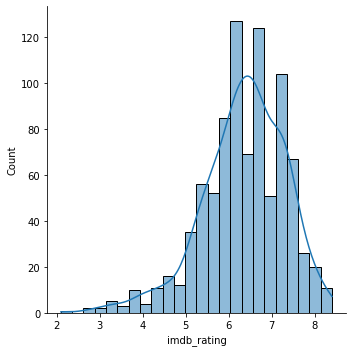

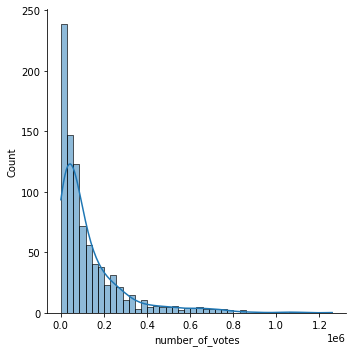

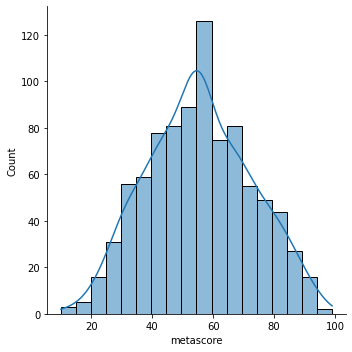

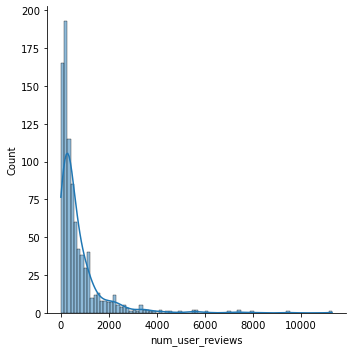

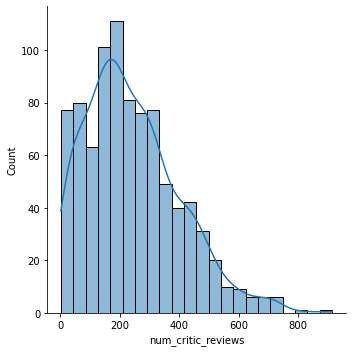

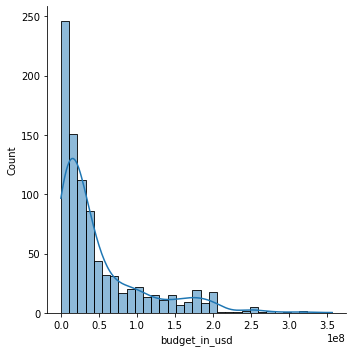

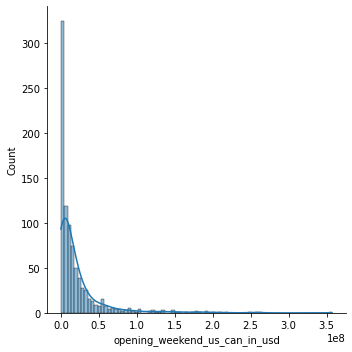

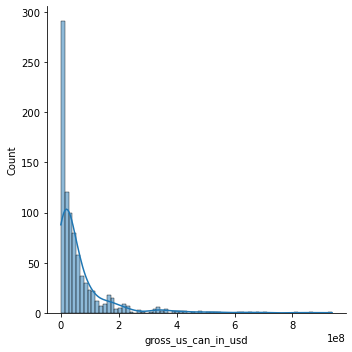

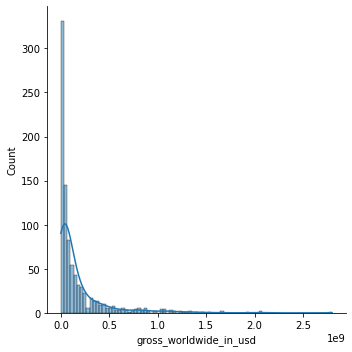

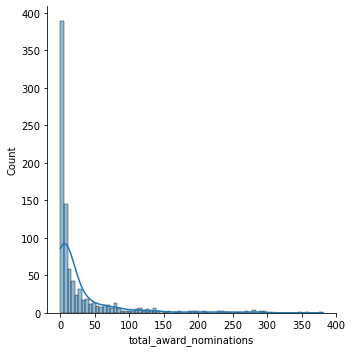

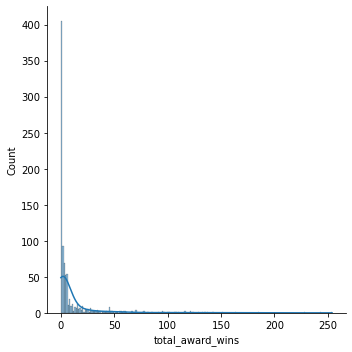

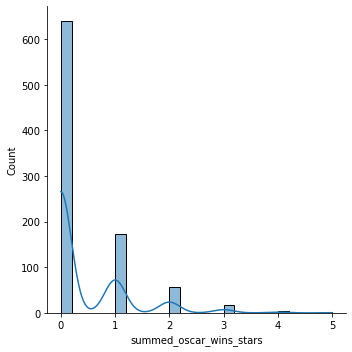

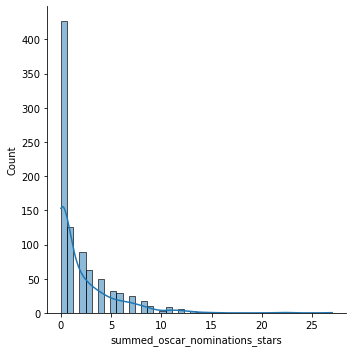

In [189]:
plot_displot(numericals_df)

# Final check

In [190]:
movies_filtered_v2.isna().sum()

title                                        0
movie_id                                     0
movie_imdb_link                              0
certificate                                  8
runtime_in_mins                              0
genre                                        0
imdb_rating                                  0
number_of_votes                              0
metascore                                    0
top_director                                 0
release_year                                 0
awards_link                                  0
awards_total                                 0
top_writer                                   0
top_star_1                                   0
top_star_2                                   0
top_star_3                                   0
num_user_reviews                             0
num_critic_reviews                           6
release_date                                 0
country_of_origin                            0
top_productio

In [191]:
movies_filtered_v2['certificate'].value_counts(dropna=False)

Adult                372
+13/14               354
Parental Guidance    136
Not Rated             19
NaN                    8
Suitable for all       4
Name: certificate, dtype: int64

In [192]:
movies_filtered_v2['certificate']=movies_filtered_v2['certificate'].fillna('Not Rated')
movies_filtered_v2['certificate'].value_counts(dropna=False)

Adult                372
+13/14               354
Parental Guidance    136
Not Rated             27
Suitable for all       4
Name: certificate, dtype: int64

In [193]:
movies_filtered_v2['num_critic_reviews']=movies_filtered_v2['num_critic_reviews'].fillna(0)

In [194]:
movies_filtered_v2.isna().sum().sum()

0

In [195]:
movies_filtered_v2['top_production_company_grouped'].value_counts(dropna=False)

Other                 746
Universal Pictures     42
Columbia Pictures      38
Warner Bros.           35
Paramount Pictures     32
Name: top_production_company_grouped, dtype: int64

In [196]:
movies_filtered_v2.shape

(893, 46)

In [197]:
movies_filtered_v2.to_csv('movies_treated.csv')
